Here we will analyze the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results = pd.read_csv('/home/thara/Big/final_results.csv')
results

,bestObjID,plate,mjd,fiberid,flux_ratio,SOURCE_ID,phot_bp_mean_flux,phot_rp_mean_flux,photometric_flux_ratio
0,1237663784201486401,7868,57006,816,2.177181,2543193557806316800,771.161658,812.454893,0.949175
1,1237665548902859021,2202,53566,290,2.016669,4463606678617356800,230.410150,216.745479,1.063045
2,1237654380901957961,7512,56777,134,1.728434,1014204471947028992,59.991009,88.311689,0.679310
3,1237655693011845153,918,52404,515,1.013675,3652568217199181440,350.539988,705.208239,0.497073
4,1237667322185580645,2236,53729,1,0.747908,3961435288437544320,114.175541,260.146202,0.438890
...,...,...,...,...,...,...,...,...,...
133751,1237680273108960003,7572,56944,710,1.510391,1779912581508627072,98.424982,43.140794,2.281483
133752,1237680285996155390,6265,56248,512,1.797892,309194386402373120,48.999154,76.712520,0.638737
133753,1237680303715582376,6295,56536,434,0.798917,1883704073988238336,103.721589,334.565475,0.310019
133754,1237680308016841309,6515,56536,932,1.233320,2866659811294043904,164.762430,69.931613,2.356051


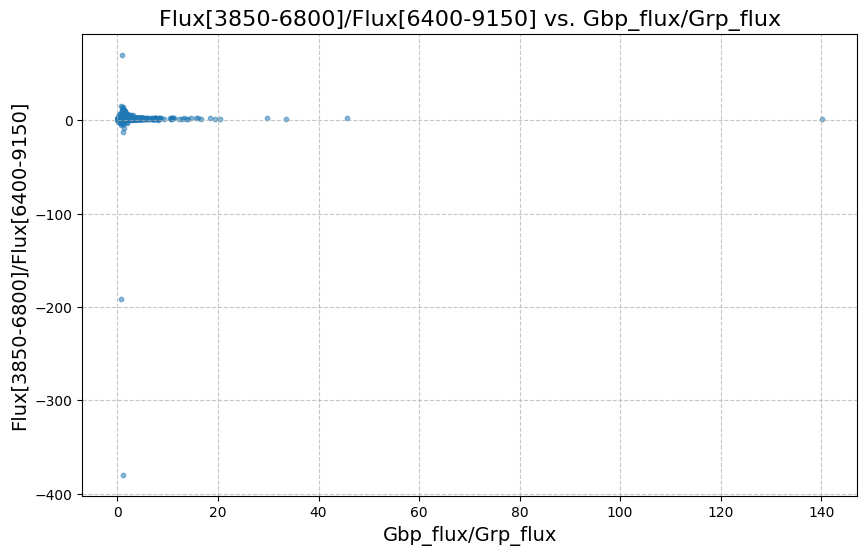

In [3]:
# Plot flux_ratio vs photometric_flux_ratio
plt.figure(figsize=(10, 6))
plt.scatter(results['photometric_flux_ratio'], results['flux_ratio'], alpha=0.5, s=10)
plt.title("Flux[3850-6800]/Flux[6400-9150] vs. Gbp_flux/Grp_flux", fontsize=16)
plt.xlabel("Gbp_flux/Grp_flux", fontsize=14)
plt.ylabel("Flux[3850-6800]/Flux[6400-9150]", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("/home/thara/Big/flux_ratio_vs_photometric_flux_ratio.png", dpi=300, bbox_inches='tight')
plt.show()

In [3]:
# Calculate IQR for both columns
q1_flux_ratio = results['flux_ratio'].quantile(0.25)
q3_flux_ratio = results['flux_ratio'].quantile(0.75)
iqr_flux_ratio = q3_flux_ratio - q1_flux_ratio

q1_photometric_flux_ratio = results['photometric_flux_ratio'].quantile(0.25)
q3_photometric_flux_ratio = results['photometric_flux_ratio'].quantile(0.75)
iqr_photometric_flux_ratio = q3_photometric_flux_ratio - q1_photometric_flux_ratio

# Define thresholds for outliers (1.5 times the IQR is standard)
lower_bound_flux_ratio = q1_flux_ratio - 1.5 * iqr_flux_ratio
upper_bound_flux_ratio = q3_flux_ratio + 1.5 * iqr_flux_ratio

lower_bound_photometric_flux_ratio = q1_photometric_flux_ratio - 1.5 * iqr_photometric_flux_ratio
upper_bound_photometric_flux_ratio = q3_photometric_flux_ratio + 1.5 * iqr_photometric_flux_ratio

# Identify outliers
outliers = results[
    (results['flux_ratio'] < lower_bound_flux_ratio) |
    (results['flux_ratio'] > upper_bound_flux_ratio) |
    (results['photometric_flux_ratio'] < lower_bound_photometric_flux_ratio) |
    (results['photometric_flux_ratio'] > upper_bound_photometric_flux_ratio)
]

# Remove outliers from the data
filtered_df = results[
    (results['flux_ratio'] >= lower_bound_flux_ratio) &
    (results['flux_ratio'] <= upper_bound_flux_ratio) &
    (results['photometric_flux_ratio'] >= lower_bound_photometric_flux_ratio) &
    (results['photometric_flux_ratio'] <= upper_bound_photometric_flux_ratio)
]

# Save filtered and outlier data for further inspection
outliers.to_csv("/home/thara/Big/outliers.csv", index=False)
filtered_df.to_csv("/home/thara/Big/filtered_results.csv", index=False)

print(f"Identified {len(outliers)} outliers.")
print(f"Filtered data contains {len(filtered_df)} rows.")

Identified 2631 outliers.
Filtered data contains 130890 rows.


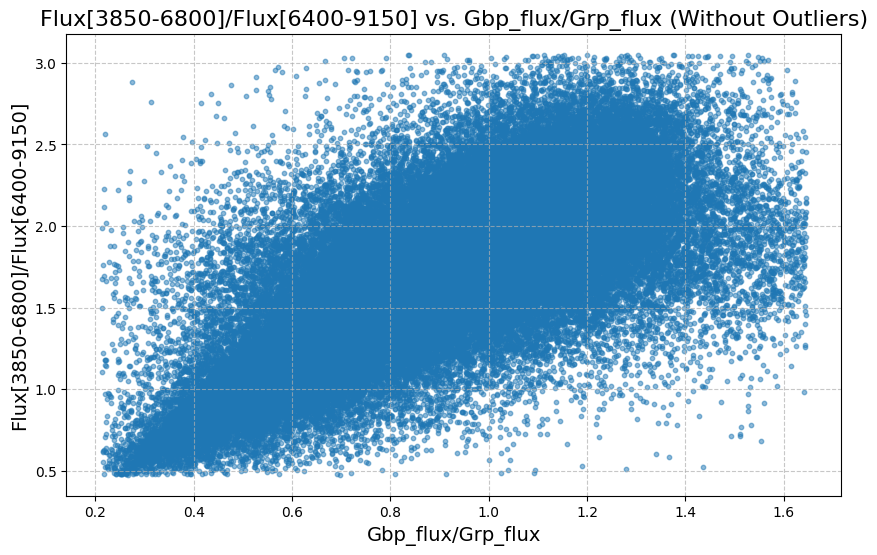

In [5]:
# Plot flux_ratio vs photometric_flux_ratio without outliers
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['photometric_flux_ratio'], filtered_df['flux_ratio'],  alpha=0.5, s=10)
plt.title("Flux[3850-6800]/Flux[6400-9150] vs. Gbp_flux/Grp_flux (Without Outliers)", fontsize=16)
plt.xlabel("Gbp_flux/Grp_flux", fontsize=14)
plt.ylabel("Flux[3850-6800]/Flux[6400-9150]", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("/home/thara/Big/flux_ratio_vs_photometric_flux_ratio_no_outliers.png", dpi=300, bbox_inches='tight')
plt.show()

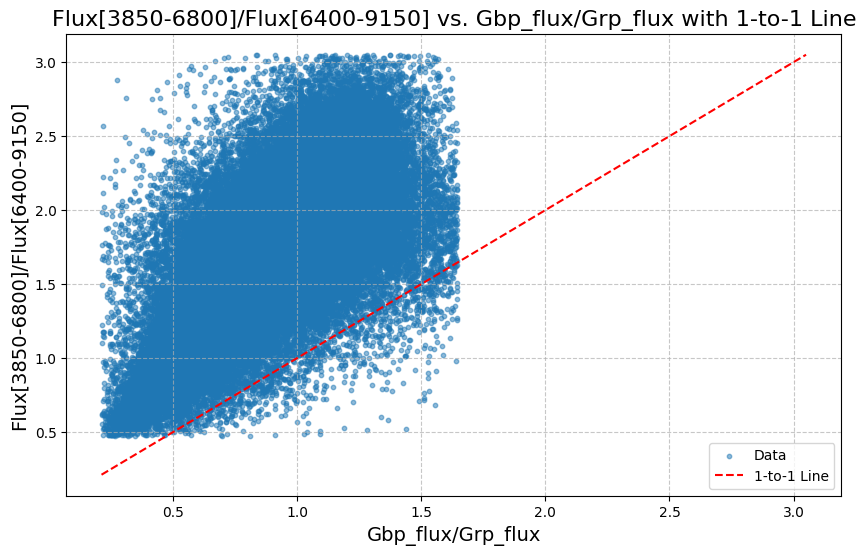

In [6]:
# Plot flux_ratio vs photometric_flux_ratio
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['photometric_flux_ratio'], filtered_df['flux_ratio'], alpha=0.5, s=10, label='Data')

# Add a 1-to-1 line
min_value = min(filtered_df['photometric_flux_ratio'].min(), filtered_df['flux_ratio'].min())
max_value = max(filtered_df['photometric_flux_ratio'].max(), filtered_df['flux_ratio'].max())
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='1-to-1 Line')

# Add labels, legend, and grid
plt.title("Flux[3850-6800]/Flux[6400-9150] vs. Gbp_flux/Grp_flux with 1-to-1 Line", fontsize=16)
plt.xlabel("Gbp_flux/Grp_flux", fontsize=14)
plt.ylabel("Flux[3850-6800]/Flux[6400-9150]", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.savefig("/home/thara/Big/flux_ratio_vs_photometric_flux_ratio_line.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_9104/3187692002.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("/home/thara/Big/flux_ratio_vs_photometric_flux_ratio_line_Fitted.png", dpi=300, bbox_inches='tight')


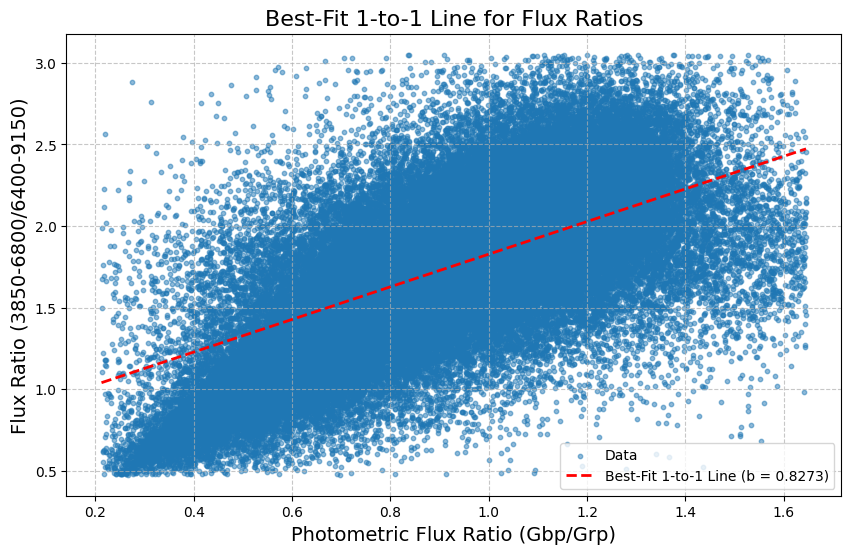

In [5]:
# Filtered data columns
x = filtered_df['photometric_flux_ratio']
y = filtered_df['flux_ratio']

# Calculate the intercept (b) for the 1-to-1 line
intercept = np.mean(y) - np.mean(x)

# Generate the best-fit 1-to-1 line
x_line = np.linspace(min(x), max(x), 100)
y_line = x_line + intercept

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data', s=10)

# Plot the best-fit 1-to-1 line
plt.plot(x_line, y_line, color='red', linestyle='--', linewidth=2, label=f'Best-Fit 1-to-1 Line (b = {intercept:.4f})')

# Add labels, title, and legend
plt.title("Best-Fit 1-to-1 Line for Flux Ratios", fontsize=16)
plt.xlabel("Photometric Flux Ratio (Gbp/Grp)", fontsize=14)
plt.ylabel("Flux Ratio (3850-6800/6400-9150)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.savefig("/home/thara/Big/flux_ratio_vs_photometric_flux_ratio_line_Fitted.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Ensure no NaN values are present in the columns before calculating correlation
filtered_df_cleaned = filtered_df.dropna(subset=['flux_ratio', 'photometric_flux_ratio'])

# Calculate the Pearson correlation coefficient
correlation = filtered_df_cleaned['flux_ratio'].corr(filtered_df_cleaned['photometric_flux_ratio'])

print(f"The Pearson correlation coefficient between Flux[3850-6800]/Flux[6400-9150] and Gbp_flux/Grp_flux is: {correlation:.4f}")

The Pearson correlation coefficient between Flux[3850-6800]/Flux[6400-9150] and Gbp_flux/Grp_flux is: 0.7446


In [ ]:
# Ensure no NaN values are present in the columns
filtered_df_cleaned = filtered_df.dropna(subset=['flux_ratio', 'photometric_flux_ratio'])

# Calculate standard deviation
std_flux_ratio = filtered_df_cleaned['flux_ratio'].std()
std_photometric_flux_ratio = filtered_df_cleaned['photometric_flux_ratio'].std()

# Calculate variance
var_flux_ratio = filtered_df_cleaned['flux_ratio'].var()
var_photometric_flux_ratio = filtered_df_cleaned['photometric_flux_ratio'].var()

# Print results
print(f"Standard Deviation of 'flux_ratio': {std_flux_ratio:.4f}")
print(f"Standard Deviation of 'photometric_flux_ratio': {std_photometric_flux_ratio:.4f}")
print(f"Variance of 'flux_ratio': {var_flux_ratio:.4f}")
print(f"Variance of 'photometric_flux_ratio': {var_photometric_flux_ratio:.4f}")

Standard Deviation of 'flux_ratio': 0.4658
Standard Deviation of 'photometric_flux_ratio': 0.2521
Variance of 'flux_ratio': 0.2170
Variance of 'photometric_flux_ratio': 0.0635


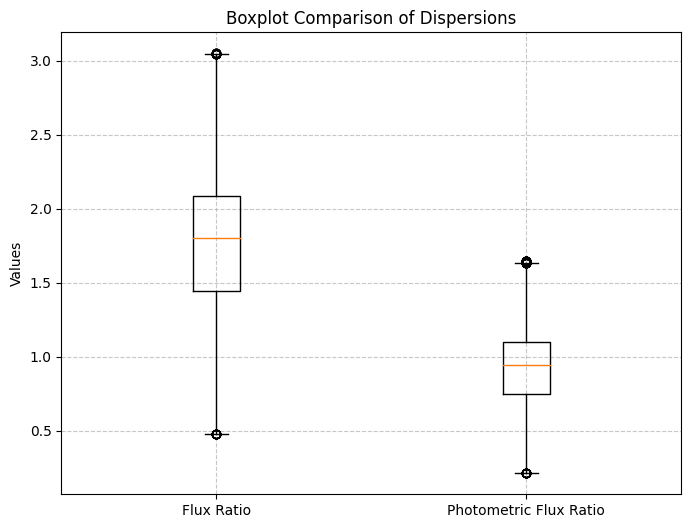

In [9]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    [filtered_df_cleaned['flux_ratio'], filtered_df_cleaned['photometric_flux_ratio']],
    labels=['Flux Ratio', 'Photometric Flux Ratio']
)
plt.title("Boxplot Comparison of Dispersions")
plt.ylabel("Values")
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("/home/thara/Big/Boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

Extra analysis.

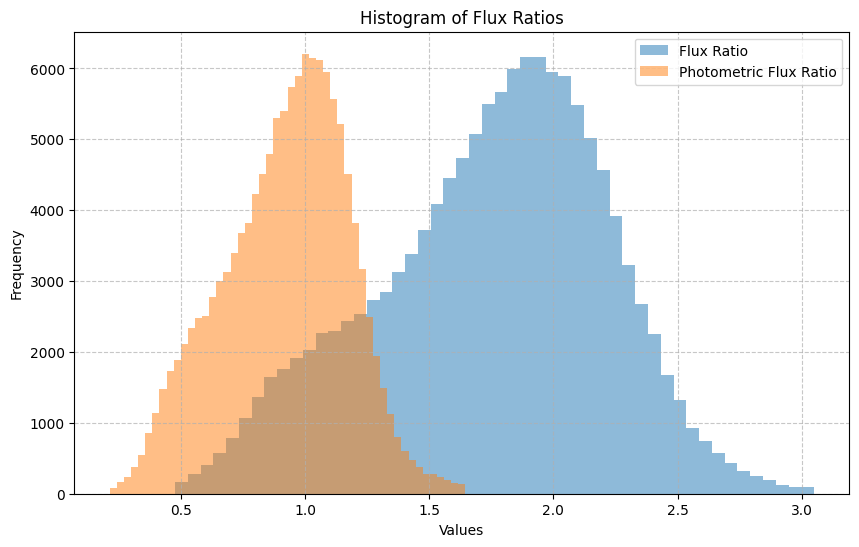

In [10]:
plt.figure(figsize=(10, 6))
filtered_df_cleaned['flux_ratio'].plot(kind='hist', bins=50, alpha=0.5, label='Flux Ratio')
filtered_df_cleaned['photometric_flux_ratio'].plot(kind='hist', bins=50, alpha=0.5, label='Photometric Flux Ratio')
plt.title("Histogram of Flux Ratios")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("/home/thara/Big/Histogram.png", dpi=300, bbox_inches='tight')
plt.show()

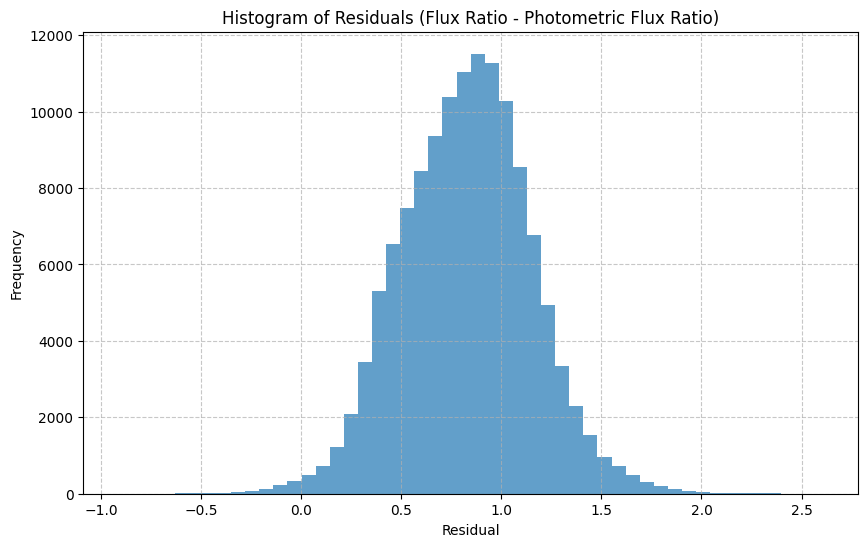

In [11]:
filtered_df_cleaned['residual'] = (
    filtered_df_cleaned['flux_ratio'] - filtered_df_cleaned['photometric_flux_ratio']
)
plt.figure(figsize=(10, 6))
filtered_df_cleaned['residual'].plot(kind='hist', bins=50, alpha=0.7)
plt.title("Histogram of Residuals (Flux Ratio - Photometric Flux Ratio)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("/home/thara/Big/Residuals.png", dpi=300, bbox_inches='tight')
plt.show()

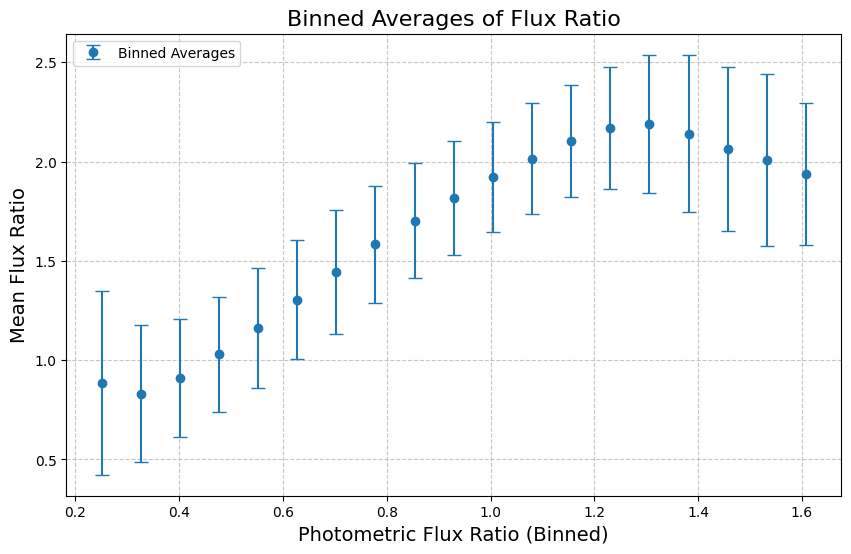

In [15]:
# Define bins for photometric_flux_ratio
bins = np.linspace(
    filtered_df_cleaned['photometric_flux_ratio'].min(), 
    filtered_df_cleaned['photometric_flux_ratio'].max(), 
    20  # Number of bins
)

# Group by bins and calculate mean and std
binned = filtered_df_cleaned.groupby(pd.cut(filtered_df_cleaned['photometric_flux_ratio'], bins))
binned_means = binned['flux_ratio'].mean()
binned_stds = binned['flux_ratio'].std()

# Calculate bin midpoints
bin_midpoints = bins[:-1] + np.diff(bins) / 2

# Plot binned averages with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(bin_midpoints, binned_means, yerr=binned_stds, fmt='o', capsize=5, label='Binned Averages')
plt.title("Binned Averages of Flux Ratio", fontsize=16)
plt.xlabel("Photometric Flux Ratio (Binned)", fontsize=14)
plt.ylabel("Mean Flux Ratio", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.savefig("/home/thara/Big/Binned.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
quantiles = pd.qcut(filtered_df_cleaned['photometric_flux_ratio'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
subgroup_corrs = filtered_df_cleaned.groupby(quantiles).apply(
    lambda x: x['flux_ratio'].corr(x['photometric_flux_ratio'])
)
print("Correlation by Subgroup:")
print(subgroup_corrs)

Correlation by Subgroup:
photometric_flux_ratio
Q1    0.549776
Q2    0.296228
Q3    0.198329
Q4    0.011851
dtype: float64


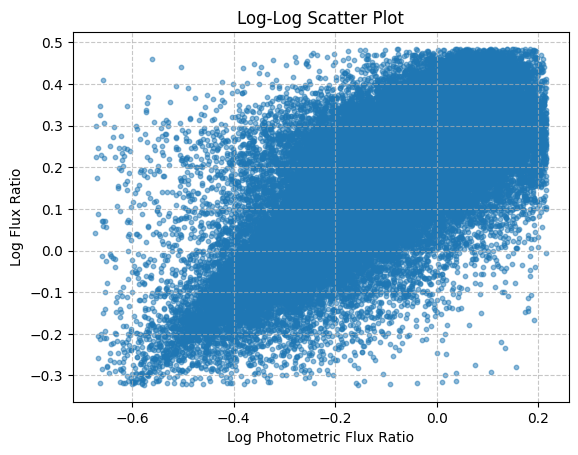

In [18]:
filtered_df_cleaned['log_flux_ratio'] = np.log10(filtered_df_cleaned['flux_ratio'])
filtered_df_cleaned['log_photometric_flux_ratio'] = np.log10(filtered_df_cleaned['photometric_flux_ratio'])

plt.scatter(filtered_df_cleaned['log_photometric_flux_ratio'], filtered_df_cleaned['log_flux_ratio'], alpha=0.5, s=10)
plt.title("Log-Log Scatter Plot")
plt.xlabel("Log Photometric Flux Ratio")
plt.ylabel("Log Flux Ratio")
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("/home/thara/Big/log.png", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Summary statistics for outliers
filtered_df_cleaned_stats = filtered_df_cleaned[['flux_ratio', 'photometric_flux_ratio']].describe()
print("Summary Statistics for filtered_df_cleaned:\n", filtered_df_cleaned_stats)

Summary Statistics for filtered_df_cleaned:
           flux_ratio  photometric_flux_ratio
count  130890.000000           130890.000000
mean        1.747848                0.920542
std         0.465797                0.252080
min         0.475613                0.212498
25%         1.441527                0.748153
50%         1.802125                0.946808
75%         2.082665                1.101869
max         3.050184                1.645696


Analyzis of the outliers.

In [19]:
# Summary statistics for outliers
outlier_stats = outliers[['flux_ratio', 'photometric_flux_ratio']].describe()
print("Summary Statistics for Outliers:\n", outlier_stats)

Summary Statistics for Outliers:
         flux_ratio  photometric_flux_ratio
count  2631.000000             2629.000000
mean      1.835221                1.847608
std       8.556594                3.327668
min    -379.852264                0.005034
25%       1.461260                1.069267
50%       1.901416                1.724104
75%       2.477421                2.039385
max      70.129303              140.183523


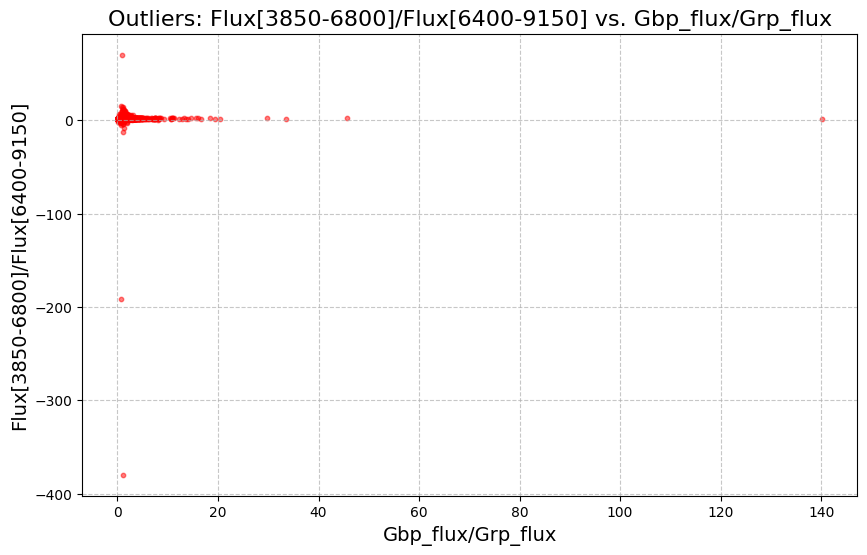

In [35]:
# Scatter plot of outliers
plt.figure(figsize=(10, 6))
plt.scatter(outliers['photometric_flux_ratio'], outliers['flux_ratio'], alpha=0.5, s=10, color='red')
plt.title("Outliers: Flux[3850-6800]/Flux[6400-9150] vs. Gbp_flux/Grp_flux", fontsize=16)
plt.xlabel("Gbp_flux/Grp_flux", fontsize=14)
plt.ylabel("Flux[3850-6800]/Flux[6400-9150]", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("/home/thara/Big/Outliers.png", dpi=300, bbox_inches='tight')
plt.show()

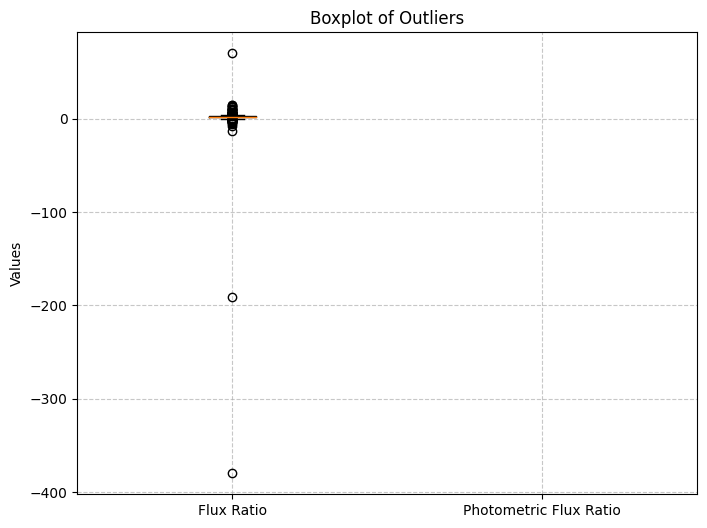

In [36]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    [outliers['flux_ratio'], outliers['photometric_flux_ratio']],
    labels=['Flux Ratio', 'Photometric Flux Ratio']
)
plt.title("Boxplot of Outliers")
plt.ylabel("Values")
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("/home/thara/Big/Outliers_Box.png", dpi=300, bbox_inches='tight')
plt.show()

In [33]:
# Add a column for the absolute value of flux_ratio
outliers['abs_flux_ratio'] = outliers['flux_ratio'].abs()

# Sort by the highest absolute value of flux_ratio
sorted_outliers = outliers.sort_values(by='abs_flux_ratio', ascending=False)

# Display the top 10 extreme outliers based on absolute value
sorted_outliers.head(5)


/tmp/ipykernel_6515/3673246953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['abs_flux_ratio'] = outliers['flux_ratio'].abs()


,bestObjID,plate,mjd,fiberid,flux_ratio,SOURCE_ID,phot_bp_mean_flux,phot_rp_mean_flux,photometric_flux_ratio,residual,log_flux_ratio,log_photometric_flux_ratio,abs_flux_ratio
47117,1237663786882368114,3682,55244,934,-379.852264,1032482134772158080,79.303923,77.260797,1.026445,-380.878709,NaN,0.011335,379.852264
130051,1237666407379894934,3639,55205,144,-191.466171,2508976957811911552,58.697364,75.875453,0.773601,-192.239773,NaN,-0.111483,191.466171
55023,1237666339188441464,693,52254,175,70.129303,2536417400786722432,131.823804,138.056256,0.954856,69.174447,1.845900,-0.020062,70.129303
130676,1237654608530768221,6974,56442,434,14.703096,1584581939947144320,129.534070,187.849553,0.689563,14.013534,1.167409,-0.161426,14.703096
128911,1237680121711165751,7154,56955,398,14.372270,2523296554871213184,53.167680,52.796552,1.007029,13.365240,1.157525,0.003042,14.372270


In [34]:
# Add a column for the absolute value of photometric_flux_ratio
outliers['abs_photometric_flux_ratio'] = outliers['photometric_flux_ratio'].abs()

# Sort by the highest absolute value of photometric_flux_ratio
sorted_photometric_outliers = outliers.sort_values(by='abs_photometric_flux_ratio', ascending=False)

# Display the top 10 extreme outliers
sorted_photometric_outliers.head(5)


/tmp/ipykernel_6515/2702778064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['abs_photometric_flux_ratio'] = outliers['photometric_flux_ratio'].abs()


,bestObjID,plate,mjd,fiberid,flux_ratio,SOURCE_ID,phot_bp_mean_flux,phot_rp_mean_flux,photometric_flux_ratio,residual,log_flux_ratio,log_photometric_flux_ratio,abs_flux_ratio,abs_photometric_flux_ratio
75661,1237661850395869405,8373,57785,764,1.280583,1538688595186096768,205.276666,1.464342,140.183523,-138.902940,0.107408,2.146697,1.280583,140.183523
118563,1237661850400063612,8378,57785,490,1.833206,1526402793992397696,103.023402,2.252273,45.741978,-43.908772,0.263211,1.660315,1.833206,45.741978
128379,1237665127992590657,11348,58438,394,1.721655,648166678714277376,804.411943,23.923979,33.623669,-31.902013,0.235946,1.526645,1.721655,33.623669
124347,1237674367528927686,9365,57749,563,2.088255,894029740816582144,1396.857026,46.922615,29.769377,-27.681122,0.319784,1.473770,2.088255,29.769377
79469,1237680530815320921,7769,58420,900,1.324761,1885608226266355840,48.163649,2.357889,20.426600,-19.101839,0.122138,1.310196,1.324761,20.426600


In [28]:
# Group by observational metadata to check for patterns
common_metadata = outliers.groupby(['plate', 'mjd']).size().sort_values(ascending=False)
print("Most Common Plate and MJD Combinations in Outliers:\n", common_metadata.head(10))

Most Common Plate and MJD Combinations in Outliers:
 plate  mjd  
1246   54478    25
1640   53758    22
1256   52902    12
7257   56658    10
7262   56683    10
1247   52677     7
2912   54499     7
1641   53032     7
1246   53783     6
3639   55205     6
dtype: int64


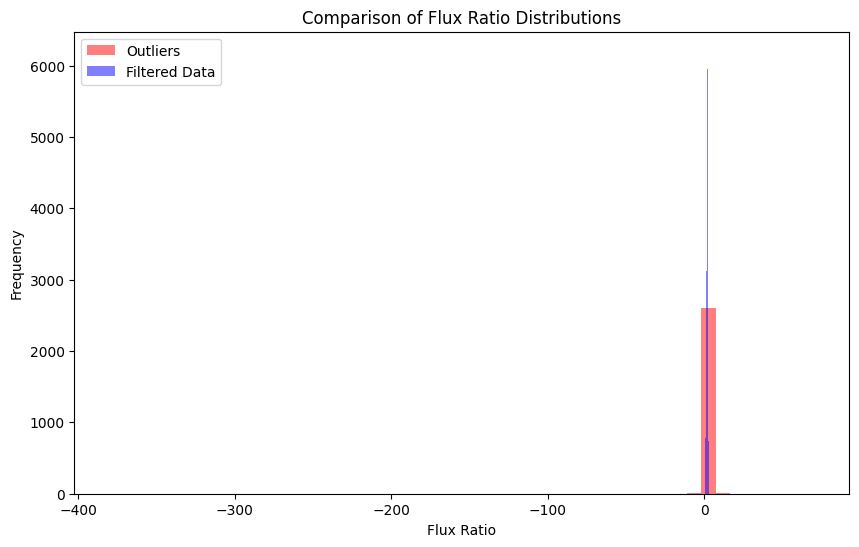

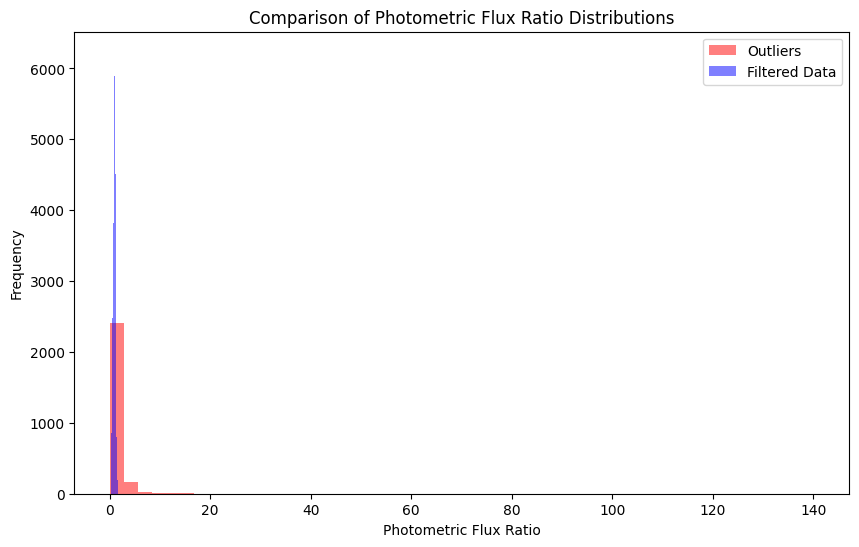

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(outliers['flux_ratio'], bins=50, alpha=0.5, label='Outliers', color='red')
plt.hist(filtered_df['flux_ratio'], bins=50, alpha=0.5, label='Filtered Data', color='blue')
plt.title("Comparison of Flux Ratio Distributions")
plt.xlabel("Flux Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("/home/thara/Big/Comparison_FluxRatio.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(outliers['photometric_flux_ratio'], bins=50, alpha=0.5, label='Outliers', color='red')
plt.hist(filtered_df['photometric_flux_ratio'], bins=50, alpha=0.5, label='Filtered Data', color='blue')
plt.title("Comparison of Photometric Flux Ratio Distributions")
plt.xlabel("Photometric Flux Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("/home/thara/Big/Comparison_Phot.png", dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_6515/1179602225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['residual'] = outliers['flux_ratio'] - outliers['photometric_flux_ratio']


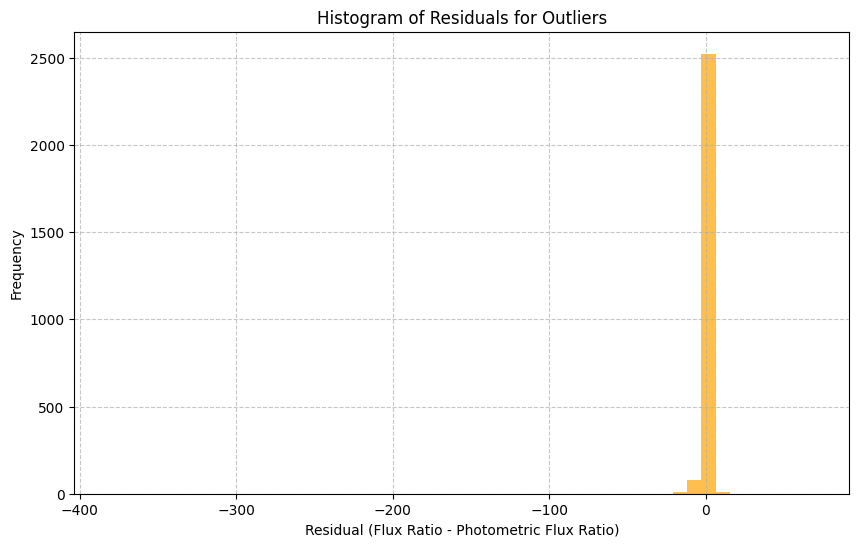

In [38]:
outliers['residual'] = outliers['flux_ratio'] - outliers['photometric_flux_ratio']
plt.figure(figsize=(10, 6))
plt.hist(outliers['residual'], bins=50, alpha=0.7, color='orange')
plt.title("Histogram of Residuals for Outliers")
plt.xlabel("Residual (Flux Ratio - Photometric Flux Ratio)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("/home/thara/Big/Outliers_Residuals.png", dpi=300, bbox_inches='tight')
plt.show()

/home/thara/.conda/envs/astro/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/thara/.conda/envs/astro/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_6515/283599551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['log_flux_ratio'] = np.log10(outliers['flux_ratio'])
/tmp/ipykernel_6515/283599551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

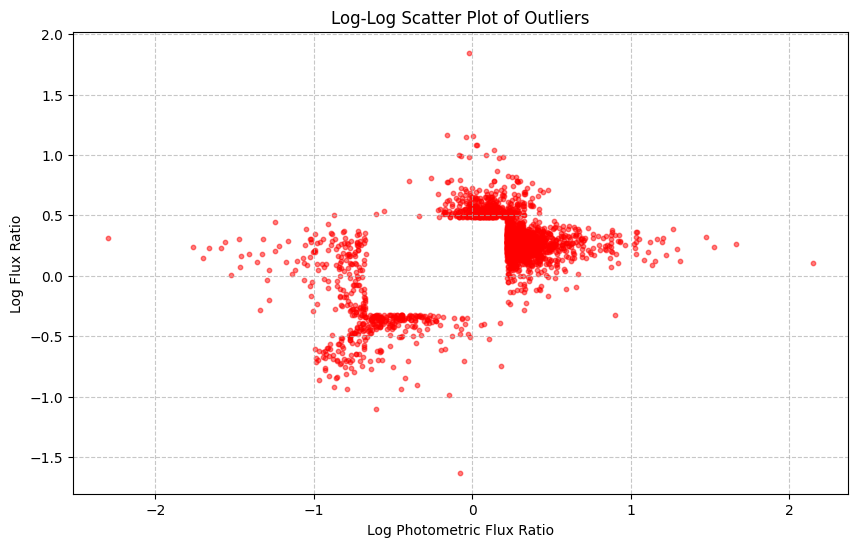

In [39]:
outliers['log_flux_ratio'] = np.log10(outliers['flux_ratio'])
outliers['log_photometric_flux_ratio'] = np.log10(outliers['photometric_flux_ratio'])

plt.figure(figsize=(10, 6))
plt.scatter(outliers['log_photometric_flux_ratio'], outliers['log_flux_ratio'], alpha=0.5, s=10, color='red')
plt.title("Log-Log Scatter Plot of Outliers")
plt.xlabel("Log Photometric Flux Ratio")
plt.ylabel("Log Flux Ratio")
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("/home/thara/Big/Outliers_Log.png", dpi=300, bbox_inches='tight')
plt.show()

In [40]:
# Sort the outliers by the highest absolute value of the residuals
sorted_outliers = outliers.sort_values(by='residual', key=abs, ascending=False)

# Display the top 10 most extreme outliers
sorted_outliers.head(5)


,bestObjID,plate,mjd,fiberid,flux_ratio,SOURCE_ID,phot_bp_mean_flux,phot_rp_mean_flux,photometric_flux_ratio,residual,log_flux_ratio,log_photometric_flux_ratio,abs_flux_ratio,abs_photometric_flux_ratio
47117,1237663786882368114,3682,55244,934,-379.852264,1032482134772158080,79.303923,77.260797,1.026445,-380.878709,NaN,0.011335,379.852264,1.026445
130051,1237666407379894934,3639,55205,144,-191.466171,2508976957811911552,58.697364,75.875453,0.773601,-192.239773,NaN,-0.111483,191.466171,0.773601
75661,1237661850395869405,8373,57785,764,1.280583,1538688595186096768,205.276666,1.464342,140.183523,-138.902940,0.107408,2.146697,1.280583,140.183523
55023,1237666339188441464,693,52254,175,70.129303,2536417400786722432,131.823804,138.056256,0.954856,69.174447,1.845900,-0.020062,70.129303,0.954856
118563,1237661850400063612,8378,57785,490,1.833206,1526402793992397696,103.023402,2.252273,45.741978,-43.908772,0.263211,1.660315,1.833206,45.741978


In [6]:
# Ensure no NaN values are present in the columns before calculating correlation
outliers_cleaned = outliers.dropna(subset=['flux_ratio', 'photometric_flux_ratio'])

# Calculate the Pearson correlation coefficient
correlation = outliers_cleaned['flux_ratio'].corr(outliers_cleaned['photometric_flux_ratio'])

print(f"The Pearson correlation coefficient between Flux[3850-6800]/Flux[6400-9150] and Gbp_flux/Grp_flux is: {correlation:.4f}")

The Pearson correlation coefficient between Flux[3850-6800]/Flux[6400-9150] and Gbp_flux/Grp_flux is: 0.0084


In [7]:
# Ensure no NaN values are present in the columns
outliers_cleaned = outliers.dropna(subset=['flux_ratio', 'photometric_flux_ratio'])

# Calculate standard deviation
std_flux_ratio = outliers_cleaned['flux_ratio'].std()
std_photometric_flux_ratio = outliers_cleaned['photometric_flux_ratio'].std()

# Calculate variance
var_flux_ratio = outliers_cleaned['flux_ratio'].var()
var_photometric_flux_ratio = outliers_cleaned['photometric_flux_ratio'].var()

# Print results
print(f"Standard Deviation of 'flux_ratio': {std_flux_ratio:.4f}")
print(f"Standard Deviation of 'photometric_flux_ratio': {std_photometric_flux_ratio:.4f}")
print(f"Variance of 'flux_ratio': {var_flux_ratio:.4f}")
print(f"Variance of 'photometric_flux_ratio': {var_photometric_flux_ratio:.4f}")

Standard Deviation of 'flux_ratio': 8.5598
Standard Deviation of 'photometric_flux_ratio': 3.3277
Variance of 'flux_ratio': 73.2695
Variance of 'photometric_flux_ratio': 11.0734


We investigate these outliers furhter.